In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 사과 전처리

In [2]:
tmp = pd.read_csv('data/loc/gyeongbuk/2apple/경주시_사과_2011~2019.csv', encoding='cp949', skiprows=2)

In [3]:
tmp['대지역'] = '경상북도'
tmp['소지역'] = '경산시'

In [4]:
tmp = tmp[['시점', '대지역', '소지역', '면적 (ha)', '생산량 (M/T)', '단위생산량 (kg/10a)']]

In [5]:
tmp

,시점,대지역,소지역,면적 (ha),생산량 (M/T),단위생산량 (kg/10a)
0,2012,경상북도,경산시,239.0,4507.0,1895.0
1,2013,경상북도,경산시,239.0,4630.0,1946.0
2,2014,경상북도,경산시,239.0,4629.0,1946.0
3,2015,경상북도,경산시,239.0,4675.0,1955.0
4,2016,경상북도,경산시,240.0,4678.0,1946.0
5,2017,경상북도,경산시,240.0,4595.0,1915.0
6,2018,경상북도,경산시,250.0,4600.0,1920.0
7,2019,경상북도,경산시,250.0,3420.0,1368.0


<AxesSubplot:xlabel='시점', ylabel='단위생산량 (kg/10a)'>

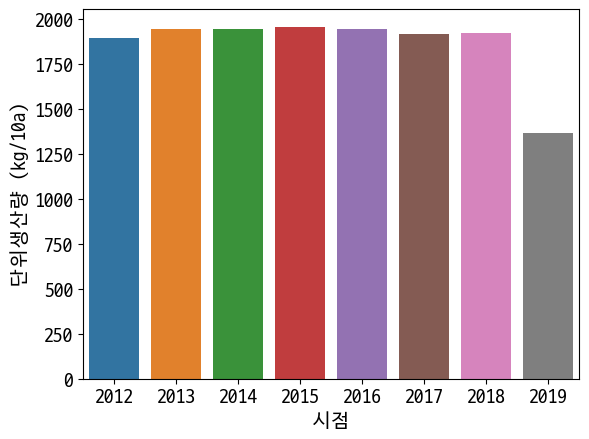

In [6]:
sns.barplot(x=tmp['시점'], y=tmp['단위생산량 (kg/10a)'], data=tmp)

## 통합처리 - 경북

In [7]:
csvfiles = glob.glob('data/loc/gyeongbuk/2apple/*.csv')

kb_apple = pd.DataFrame()
loc = ['경주시', '구미시', '군위군', '김천시', '문경시', '봉화군', '상주시',
       '성주군', '안동시', '영덕군', '영양군', '영주시', '영천시', '예천군',
       '울진군', '의성군', '청도군', '청송군', '청송군', '칠곡군', '포항시']

for idx, csvfile in enumerate(csvfiles):
    tmp = pd.read_csv(csvfile, encoding='cp949', skiprows=2)
    tmp['대지역'] = '경상북도'
    tmp['소지역'] = loc[idx]
    tmp.rename(columns={'시점':'년'}, inplace=True)
    tmp = tmp[['년', '대지역', '소지역', '면적 (ha)', '생산량 (M/T)', '단위생산량 (kg/10a)']]
    kb_apple = pd.concat([kb_apple, tmp])
    
kb_apple.reset_index(drop=True, inplace=True)

In [8]:
# 2010년 봉화군 춘양면 이상자료 삭제
kb_apple.drop(kb_apple[(kb_apple['소지역'] == '봉화군') & (kb_apple['년'] == 2010)].index, inplace=True)

## 통합처리 - 충북충남

In [9]:
csvfiles = glob.glob('data/loc/chung/2apple/*.csv')

ch_apple = pd.DataFrame()
loc1 = ['충청북도', '충청남도', '충청북도', '충청북도']
loc2 = ['영동군', '예산군', '제천시', '충주시']

for idx, csvfile in enumerate(csvfiles):
    tmp = pd.read_csv(csvfile, encoding='cp949', skiprows=2)
    tmp['대지역'] = loc1[idx]
    tmp['소지역'] = loc2[idx]
    tmp.rename(columns={'시점':'년'}, inplace=True)
    tmp = tmp[['년', '대지역', '소지역', '면적 (ha)', '생산량 (M/T)', '단위생산량 (kg/10a)']]
    ch_apple = pd.concat([ch_apple, tmp])

kb_ch_apple = pd.concat([kb_apple, ch_apple])
kb_ch_apple.reset_index(drop=True, inplace=True)

In [10]:
kb_ch_apple.to_csv('data/done/apple_loc.csv', encoding='cp949', index=False)

In [11]:
kb_ch_apple

,년,대지역,소지역,면적 (ha),생산량 (M/T),단위생산량 (kg/10a)
0,2012,경상북도,경주시,239.0,4507.0,1895.0
1,2013,경상북도,경주시,239.0,4630.0,1946.0
2,2014,경상북도,경주시,239.0,4629.0,1946.0
3,2015,경상북도,경주시,239.0,4675.0,1955.0
4,2016,경상북도,경주시,240.0,4678.0,1946.0
...,...,...,...,...,...,...
218,2016,충청북도,충주시,1894.7,32359.0,1708.0
219,2017,충청북도,충주시,1897.8,32747.0,1726.0
220,2018,충청북도,충주시,1870.0,32209.1,1722.0
221,2019,충청북도,충주시,1868.0,34081.0,1965.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '경주시'),
  Text(1, 0, '구미시'),
  Text(2, 0, '군위군'),
  Text(3, 0, '김천시'),
  Text(4, 0, '문경시'),
  Text(5, 0, '봉화군'),
  Text(6, 0, '상주시'),
  Text(7, 0, '성주군'),
  Text(8, 0, '안동시'),
  Text(9, 0, '영덕군'),
  Text(10, 0, '영양군'),
  Text(11, 0, '영주시'),
  Text(12, 0, '영천시'),
  Text(13, 0, '예천군'),
  Text(14, 0, '울진군'),
  Text(15, 0, '의성군'),
  Text(16, 0, '청도군'),
  Text(17, 0, '청송군'),
  Text(18, 0, '칠곡군'),
  Text(19, 0, '포항시')])

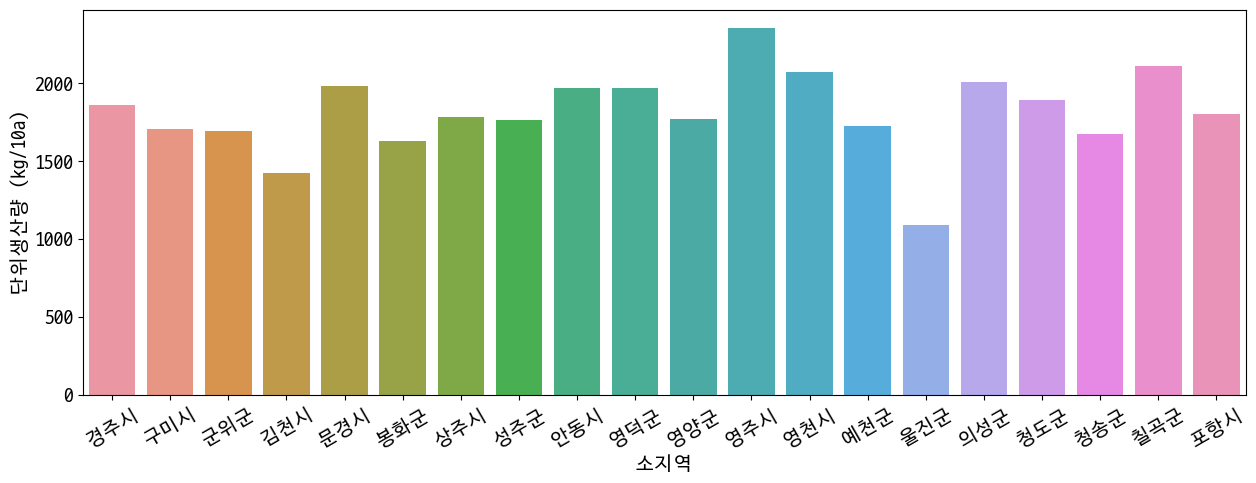

In [12]:
tmp_mean = kb_apple.groupby('소지역')['단위생산량 (kg/10a)'].mean().reset_index()

plt.figure(figsize=(15, 5))
sns.barplot(x=tmp_mean['소지역'], y=tmp_mean['단위생산량 (kg/10a)'], data=tmp_mean)
plt.xticks(rotation=30)

# 날씨 전처리

In [13]:
tmp = pd.read_csv('data/loc/gyeongbuk/1weather/경주시_날씨_2011~2019.csv', encoding='cp949', header=None, skiprows=2)

FileNotFoundError: [Errno 2] No such file or directory: 'data/loc/gyeongbuk/1weather/경주시_날씨_2011~2019.csv'

In [ ]:
tmp.columns = ['년', '월', '평균기온 (℃)', '평균 최고기온 (℃)', '최고극값기온 (℃)', '평균 최저기온 (℃)', '최저극값기온 (℃)',
       '강수량 (㎜)', '상대습도 (%)', '최소 상대습도 (%)', '평균 해면기압 (hPa)', '이슬점 온도 (℃)',
       '평균 운량 (10%)', '일조시간 (h)', '최심신적설 (㎝)', '평균 풍속 (㎧)', '최대 풍속 (㎧)',
       '최대 순간풍속 (㎧)']

In [ ]:
tmp.replace('-', np.nan, inplace=True)

In [ ]:
tmp.isnull().sum()

In [ ]:
tmp.dropna(axis=1, inplace=True)

In [ ]:
tmp['대지역'] = '경상북도'
tmp['소지역'] = '경주시'

In [ ]:
tmp.columns

## 통합처리 - 경북

In [14]:
csvfiles = glob.glob('data/loc/gyeongbuk/1weather/*.csv')

kb_weather = pd.DataFrame()
loc = ['경주시', '구미시', '군위군', '김천시', '문경시', '봉화군', '상주시',
       '성주군', '안동시', '영덕군', '영양군', '영주시', '영천시', '예천군',
       '울진군', '의성군', '청도군', '청송군', '청송군', '칠곡군', '포항시']

for idx, csvfile in enumerate(csvfiles):
    tmp = pd.read_csv(csvfile, encoding='cp949', header=None, skiprows=2)
    tmp.columns = ['년', '월', '평균기온 (℃)', '최고기온 (℃)', '최고극값기온 (℃)', '최저기온 (℃)', '최저극값기온 (℃)',
       '강수량 (㎜)', '상대습도 (%)', '최소 상대습도 (%)', '평균 해면기압 (hPa)', '이슬점 온도 (℃)',
       '평균 운량 (10%)', '일조시간 (h)', '최심신적설 (㎝)', '평균 풍속 (㎧)', '최대 풍속 (㎧)',
       '최대 순간풍속 (㎧)']
    tmp.replace('-', np.nan, inplace=True)
    tmp['대지역'] = '경상북도'
    tmp['소지역'] = loc[idx]
    tmp = tmp[['년', '월', '대지역', '소지역', '평균기온 (℃)', '최고기온 (℃)', '최저기온 (℃)',
       '강수량 (㎜)', '상대습도 (%)', '최소 상대습도 (%)', '일조시간 (h)', '평균 풍속 (㎧)', '최대 풍속 (㎧)']]
    kb_weather = pd.concat([kb_weather, tmp])
    
kb_weather.reset_index(drop=True, inplace=True)

## 통합처리 - 충북충남

In [15]:
csvfiles = glob.glob('data/loc/chung/1weather/*.csv')

ch_weather = pd.DataFrame()
loc1 = ['충청북도', '충청남도', '충청북도', '충청북도']
loc2 = ['영동군', '예산군', '제천시', '충주시']

for idx, csvfile in enumerate(csvfiles):
    tmp = pd.read_csv(csvfile, encoding='cp949', header=None, skiprows=2)
    tmp.columns = ['년', '월', '평균기온 (℃)', '최고기온 (℃)', '최고극값기온 (℃)', '최저기온 (℃)', '최저극값기온 (℃)',
       '강수량 (㎜)', '상대습도 (%)', '최소 상대습도 (%)', '평균 해면기압 (hPa)', '이슬점 온도 (℃)',
       '평균 운량 (10%)', '일조시간 (h)', '최심신적설 (㎝)', '평균 풍속 (㎧)', '최대 풍속 (㎧)',
       '최대 순간풍속 (㎧)']
    tmp.replace('-', np.nan, inplace=True)
    tmp['대지역'] = loc1[idx]
    tmp['소지역'] = loc2[idx]
    tmp = tmp[['년', '월', '대지역', '소지역', '평균기온 (℃)', '최고기온 (℃)', '최저기온 (℃)',
       '강수량 (㎜)', '상대습도 (%)', '최소 상대습도 (%)', '일조시간 (h)', '평균 풍속 (㎧)', '최대 풍속 (㎧)']]
    ch_weather = pd.concat([ch_weather, tmp])

kb_ch_weather = pd.concat([kb_weather, ch_weather])
kb_ch_weather.reset_index(drop=True, inplace=True)

In [16]:
kb_ch_weather.to_csv('data/done/weather_loc.csv', encoding='cp949', index=False)

In [17]:
kb_ch_weather.describe()

,년,평균기온 (℃),최고기온 (℃),최저기온 (℃),강수량 (㎜)
count,1590.000000,1590.000000,1590.000000,1590.00000,1590.000000
mean,2015.437107,18.643711,24.565535,13.49761,125.043836
std,2.774650,6.656833,6.104444,7.56397,102.644929
min,2010.000000,-7.900000,4.900000,-7.10000,0.900000
25%,2013.000000,13.600000,20.600000,7.32500,53.350000
50%,2015.000000,20.200000,26.200000,15.40000,96.800000
75%,2018.000000,23.875000,29.100000,20.00000,160.650000
max,2020.000000,29.000000,37.600000,25.20000,685.800000


In [18]:
kb_ch_weather.isnull().sum()

년                0
월                0
대지역              0
소지역              0
평균기온 (℃)         0
최고기온 (℃)         0
최저기온 (℃)         0
강수량 (㎜)          0
상대습도 (%)       121
최소 상대습도 (%)    121
일조시간 (h)       121
평균 풍속 (㎧)       21
최대 풍속 (㎧)      107
dtype: int64